【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [13]:
import os, time, socket, datetime
from platform import python_version
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【工作目錄】{}".format(os.getcwd()))
print("【Python】{}".format(python_version()))

【日期時間】2025/06/06 20:05:30
【主機名稱】502-12 (10.100.52.12)
【工作目錄】C:\Data
【Python】3.12.4


#### <font color=red><b>隨機顯示影像資料</b></font>

(10000,)


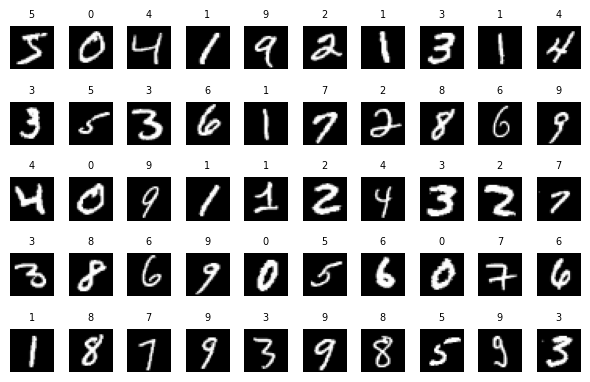

In [3]:
path_X_train = r"C:\Data\PyMLData\MNIST\train\images"
fname_y_train = r"C:\Data\PyMLData\MNIST\train\gt.txt"

# 讀進來是dataframe 轉成陣列 再轉一維陣列
y_train = pd.read_csv(fname_y_train, header=None, names=["y"]).to_numpy().reshape(-1, )
print(y_train.shape)
# 讀取圖檔
imgs_X_train = [plt.imread(path_X_train + rf"\Row{idx}.png") for idx in range(y_train.shape[0])]

n_rows, n_cols = 5, 10

plt.figure(figsize=[6, 4])
for idx in range(n_rows * n_cols) :
    plt.subplot(n_rows, n_cols, idx+1)
    plt.imshow(imgs_X_train[idx], cmap="gray")
    plt.title(y_train[idx], fontsize=7)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()
# 比對有沒排錯位置.

#### <font color=red><b>將所有image檔案依據 gt.txt 順序讀入，並轉會成一維向量</b></font>

> #### <font color=blue>依據 gt.txt 順序，讀入<b>訓練集</b>，並轉換成 一維 的陣列</font>

In [10]:
path_X_train = r"C:\Data\PyMLData\MNIST\train\images"
fname_y_train = r"C:\Data\PyMLData\MNIST\train\gt.txt"

y_train = pd.read_csv(fname_y_train, header=None, names=["y"]).to_numpy().reshape(-1, )
print(y_train.shape)

# imread 是2 維陣列, 所以需要reshape; /255 是在做標準化.
imgs_X_train = [plt.imread(path_X_train + rf"\Row{idx}.png").reshape(-1,)/255 for idx in range(y_train.shape[0])]
X_train = np.array(imgs_X_train)
print(type(X_train))
print(X_train.shape)

(10000,)
<class 'numpy.ndarray'>
(10000, 784)


> #### <font color=blue>依據 gt.txt 順序，讀入<b>測試集</b>，並轉換成 一維 的陣列</font>

In [12]:
path_X_test = r"C:\Data\PyMLData\MNIST\test\images"
fname_y_test = r"C:\Data\PyMLData\MNIST\test\gt.txt"

path_X_test = r"C:\Data\PyMLData\MNIST\test\images"
fname_y_test = r"C:\Data\PyMLData\MNIST\test\gt.txt"

y_test = pd.read_csv(fname_y_test, header=None, names=["y"]).to_numpy().reshape(-1, )
print(y_test.shape)
print(y_test)

imgs_X_test = [plt.imread(path_X_test + rf"\Row{idx}.png").reshape(-1,)/255 for idx in range(y_test.shape[0])]
X_test = np.array(imgs_X_test)
print(type(X_test))
print(X_test.shape)
print(X_test)

(1500,)
[7 2 1 ... 7 7 8]
<class 'numpy.ndarray'>
(1500, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### <font color=red><b>查看 訓練集 與 測試集 的相關資料</b></font>

In [14]:
print("【訓練集】----------")
print(X_train.shape)
print(y_train.shape)
print(Counter(y_train))  # 相異的y 值 計數
print(sorted(Counter(y_train).items(), key=lambda x:x[0], reverse=False))  # 依據 key (也就是手寫數字) 遞增排序
print(sorted(Counter(y_train).items(), key=lambda x:x[1], reverse=False))  # 依據 value (也就是手寫數字出現的次數) 遞增排序

print("\n【測試集】----------")
print(X_test.shape)
print(y_test.shape)
print(Counter(y_test))
print(sorted(Counter(y_test).items(), key=lambda x:x[0], reverse=False))   # 依據 key (也就是手寫數字) 遞增排序
print(sorted(Counter(y_test).items(), key=lambda x:x[1], reverse=False))   # 依據 value (也就是手寫數字出現的次數) 遞增排序

【訓練集】----------
(10000, 784)
(10000,)
Counter({1: 1127, 7: 1070, 3: 1032, 6: 1014, 0: 1001, 2: 991, 4: 980, 9: 978, 8: 944, 5: 863})
[(0, 1001), (1, 1127), (2, 991), (3, 1032), (4, 980), (5, 863), (6, 1014), (7, 1070), (8, 944), (9, 978)]
[(5, 863), (8, 944), (9, 978), (4, 980), (2, 991), (0, 1001), (6, 1014), (3, 1032), (7, 1070), (1, 1127)]

【測試集】----------
(1500, 784)
(1500,)
Counter({1: 179, 2: 172, 4: 167, 3: 154, 7: 150, 9: 144, 8: 140, 5: 137, 6: 131, 0: 126})
[(0, 126), (1, 179), (2, 172), (3, 154), (4, 167), (5, 137), (6, 131), (7, 150), (8, 140), (9, 144)]
[(0, 126), (6, 131), (5, 137), (8, 140), (9, 144), (7, 150), (3, 154), (4, 167), (2, 172), (1, 179)]


#### <font color=red><b>建模、訓練</b></font>

In [15]:
%%time
model = RandomForestClassifier(n_estimators=100, criterion="gini", n_jobs=-1)
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train)}")
print(f"test acc : {model.score(X_test, y_test)}")

train acc : 1.0
test acc : 0.9333333333333333
CPU times: total: 7.48 s
Wall time: 785 ms


#### <font color=red><b>混淆矩陣(Confusion Matrix) : 具有 recall & precision 邊際值</b></font>

In [16]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_train, model.predict(X_train)))
# support: 資料筆數

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1127
           2       1.00      1.00      1.00       991
           3       1.00      1.00      1.00      1032
           4       1.00      1.00      1.00       980
           5       1.00      1.00      1.00       863
           6       1.00      1.00      1.00      1014
           7       1.00      1.00      1.00      1070
           8       1.00      1.00      1.00       944
           9       1.00      1.00      1.00       978

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [18]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.97      0.99      0.98       179
           2       0.93      0.94      0.93       172
           3       0.90      0.91      0.91       154
           4       0.96      0.92      0.94       167
           5       0.95      0.92      0.94       137
           6       0.93      0.95      0.94       131
           7       0.94      0.91      0.93       150
           8       0.91      0.87      0.89       140
           9       0.89      0.93      0.91       144

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



In [19]:
pd.crosstab(index=y_test,
            columns=model.predict(X_test),
            rownames=["Actual"],
            colnames=["Predict"],)

Predict,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,125,0,0,0,0,0,1,0,0,0
1,0,178,0,0,0,0,1,0,0,0
2,0,0,161,2,0,0,3,3,3,0
3,0,0,1,140,0,4,1,4,1,3
4,1,1,1,0,154,0,2,0,1,7
5,3,0,0,3,1,126,0,1,2,1
6,3,1,0,0,1,1,124,0,1,0
7,0,2,9,1,1,0,0,136,0,1
8,1,1,1,6,3,0,2,0,122,4


In [20]:
mtx = pd.crosstab(index=y_test,
                  columns=model.predict(X_test),
                  rownames=["Actual"],
                  colnames=["Predict"],)
mtx

Predict,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,125,0,0,0,0,0,1,0,0,0
1,0,178,0,0,0,0,1,0,0,0
2,0,0,161,2,0,0,3,3,3,0
3,0,0,1,140,0,4,1,4,1,3
4,1,1,1,0,154,0,2,0,1,7
5,3,0,0,3,1,126,0,1,2,1
6,3,1,0,0,1,1,124,0,1,0
7,0,2,9,1,1,0,0,136,0,1
8,1,1,1,6,3,0,2,0,122,4


In [21]:
mtx2 = mtx.copy()
# print(mtx.sum(axis=1))
mtx2["recall"] = np.round(np.array([mtx.iat[idx, idx]/mtx.sum(axis=1)[idx] for idx in range(10)]), 2)
mtx2

Predict,0,1,2,3,4,5,6,7,8,9,recall
Actual,,,,,,,,,,,
0,125,0,0,0,0,0,1,0,0,0,0.99
1,0,178,0,0,0,0,1,0,0,0,0.99
2,0,0,161,2,0,0,3,3,3,0,0.94
3,0,0,1,140,0,4,1,4,1,3,0.91
4,1,1,1,0,154,0,2,0,1,7,0.92
5,3,0,0,3,1,126,0,1,2,1,0.92
6,3,1,0,0,1,1,124,0,1,0,0.95
7,0,2,9,1,1,0,0,136,0,1,0.91
8,1,1,1,6,3,0,2,0,122,4,0.87


In [22]:
# print(mtx.sum(axis=0))
mtx2.loc["precision"] = np.round([mtx.iat[idx, idx]/mtx.sum(axis=0)[idx] for idx in range(10)] + [np.trace(mtx)/mtx.sum().sum()], 2)
mtx2

Predict,0,1,2,3,4,5,6,7,8,9,recall
Actual,,,,,,,,,,,
0,125.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.99
1,0.00,178.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.99
2,0.00,0.00,161.00,2.0,0.00,0.00,3.00,3.00,3.00,0.00,0.94
3,0.00,0.00,1.00,140.0,0.00,4.00,1.00,4.00,1.00,3.00,0.91
4,1.00,1.00,1.00,0.0,154.00,0.00,2.00,0.00,1.00,7.00,0.92
5,3.00,0.00,0.00,3.0,1.00,126.00,0.00,1.00,2.00,1.00,0.92
6,3.00,1.00,0.00,0.0,1.00,1.00,124.00,0.00,1.00,0.00,0.95
7,0.00,2.00,9.00,1.0,1.00,0.00,0.00,136.00,0.00,1.00,0.91
8,1.00,1.00,1.00,6.0,3.00,0.00,2.00,0.00,122.00,4.00,0.87


#### <font color=red><b>ROC Curve & AUC</b></font>

In [24]:
from sklearn.metrics import roc_curve, auc

(1500, 10)


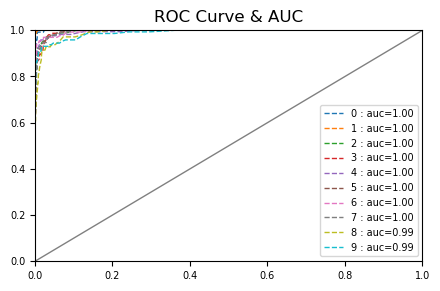

In [25]:
probs = model.predict_proba(X_test)
print(probs.shape)

plt.figure(figsize=[5, 3])
for idx in range(probs.shape[1]) :
    pos_label = idx
    fpr, tpr, _ = roc_curve(y_test, probs[:, pos_label], pos_label=pos_label)
    AUC = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle="--", linewidth=1, label=f"{pos_label} : auc={AUC:.2f}")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel="False Positive Rate"
plt.ylabel="True Positive Rate"
plt.title("ROC Curve & AUC")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(loc="lower right", fontsize=7)
plt.plot([0, 1], [0, 1], linestyle="-", linewidth=1, color="gray")
plt.show()